# **This is the "Getting started with Titanic" competition used to learn more about machine learning and to test different ideas.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# **Reading in the test and train data**

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Using both the test_data and train_data to gather some information**

**First we look at pairplots**

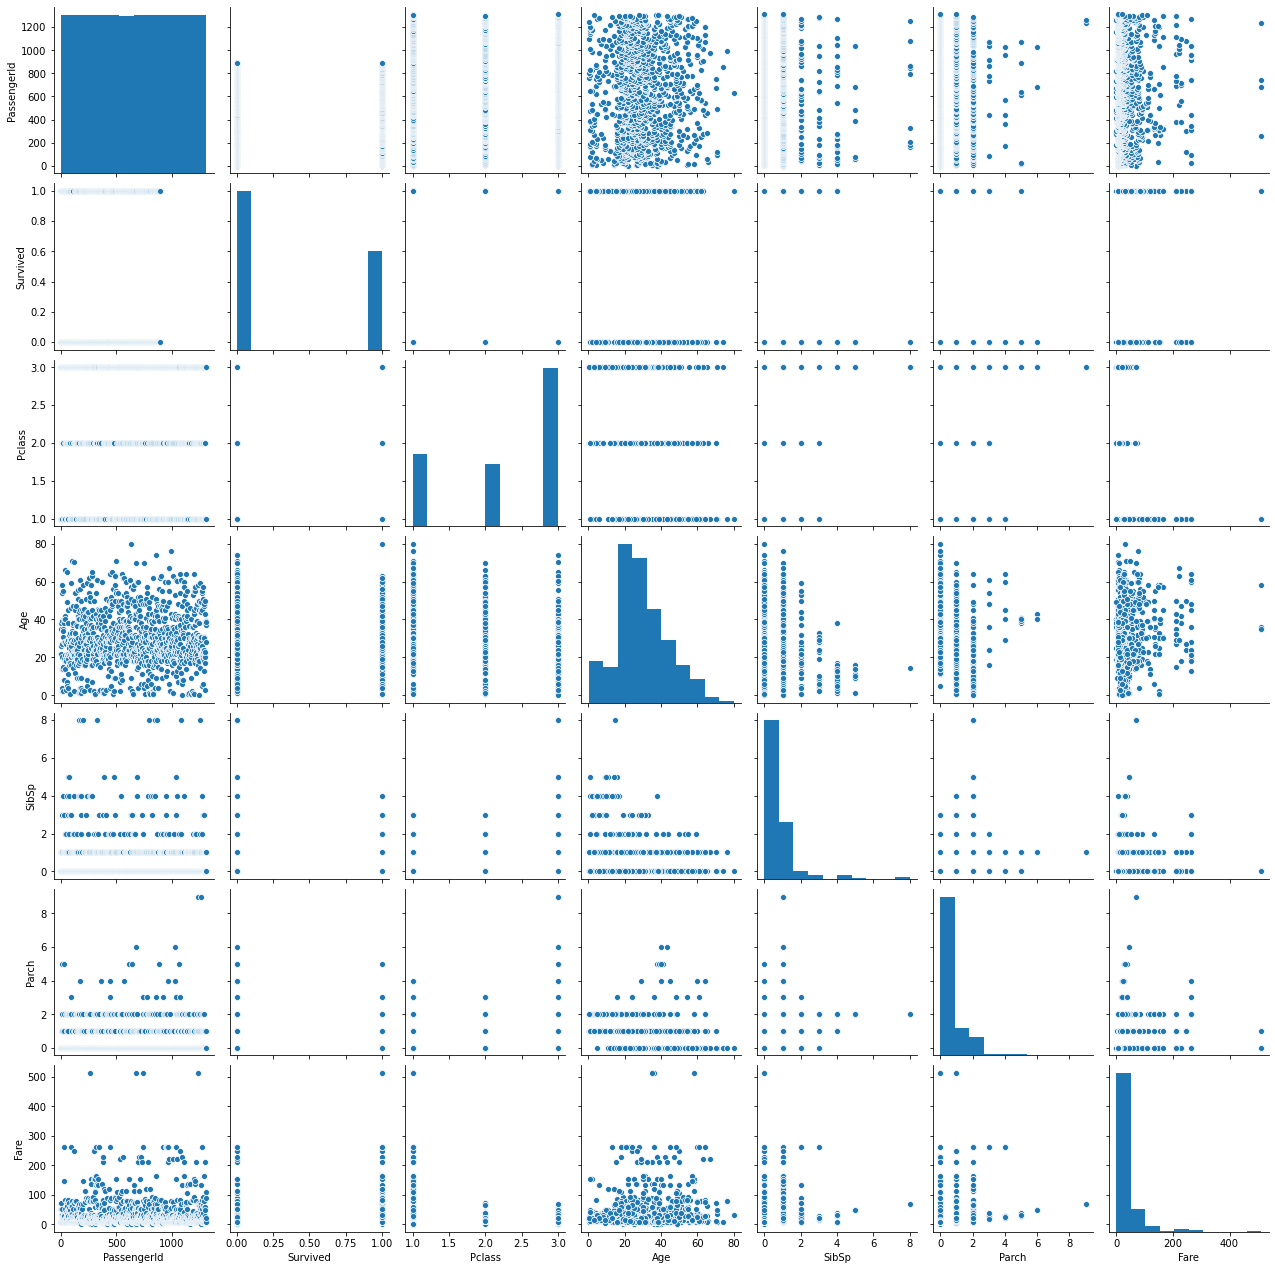

In [4]:
complete_data=pd.concat(objs=[train_data, test_data], axis=0).reset_index(drop=True)
sns.pairplot(complete_data)
plt.show()

**Second we look at fare and age distributions across the different class**

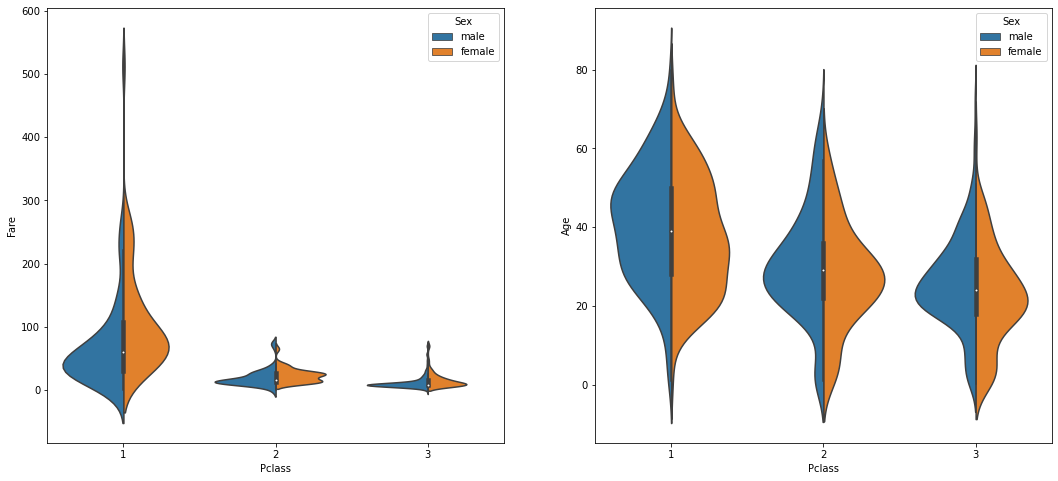

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(complete_data['Pclass'],complete_data['Fare'],hue=complete_data['Sex'],split=True,ax=ax[0])

sns.violinplot(complete_data['Pclass'],complete_data['Age'],hue=complete_data['Sex'],split=True,ax=ax[1])
plt.show()

**Next we look at the passenger distribution across different class and embarkment ports**

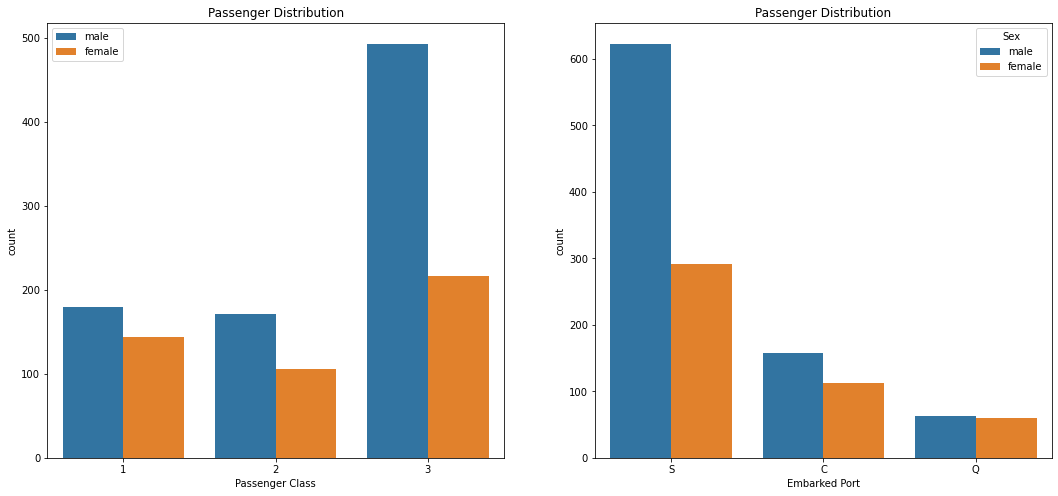

In [6]:
# Some plots using the train_data
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Pclass',hue='Sex',data=complete_data,ax=ax[0])
ax[0].set_xlabel('Passenger Class')
ax[0].set_title('Passenger Distribution')
ax[0].legend(loc=2)

sns.countplot('Embarked',hue='Sex',data=complete_data,ax=ax[1])
ax[1].set_xlabel('Embarked Port')
ax[1].set_title('Passenger Distribution')

plt.show()

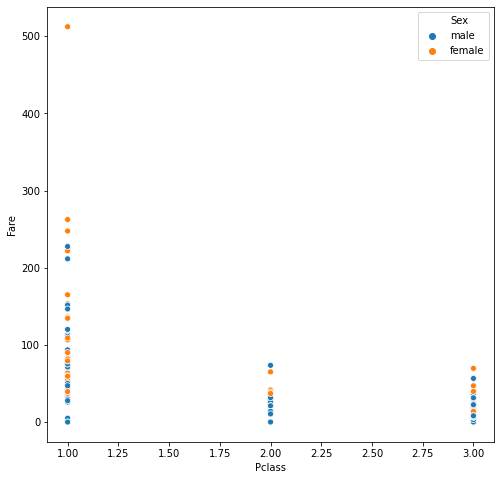

In [7]:
plt.figure(figsize=(8,8))
#sns.lmplot(x='Pclass',y ='Fare',data=complete_data)
sns.scatterplot(complete_data['Pclass'],complete_data['Fare'],hue=complete_data['Sex'])
plt.show()

**We can check if the data has any null values**

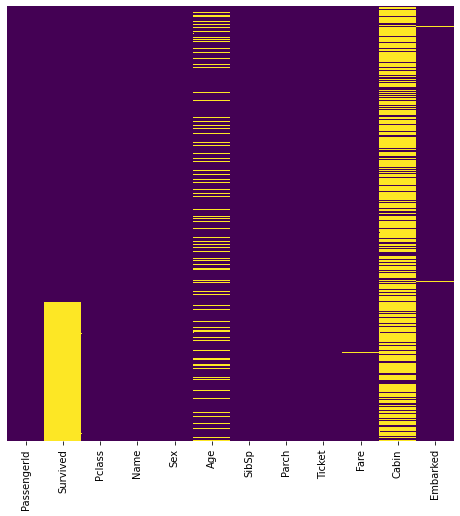

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(complete_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**A few things to note here**
* The null values is survived are the ones we want to predict
* The missing ages are a tricky problem but can be tackled
* The missing cabins might seem like the problem put my guess is that they are just associated with passengers in 3rd class who did not get private cabins

In [9]:
complete_data[complete_data['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **Back to using only train_data**

In [10]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print('During the sinking of the Titanic '+str(round(rate_women*100,2))+'% of women survived while '+str(round(rate_men*100,2))+'% of men survived')

During the sinking of the Titanic 74.2% of women survived while 18.89% of men survived


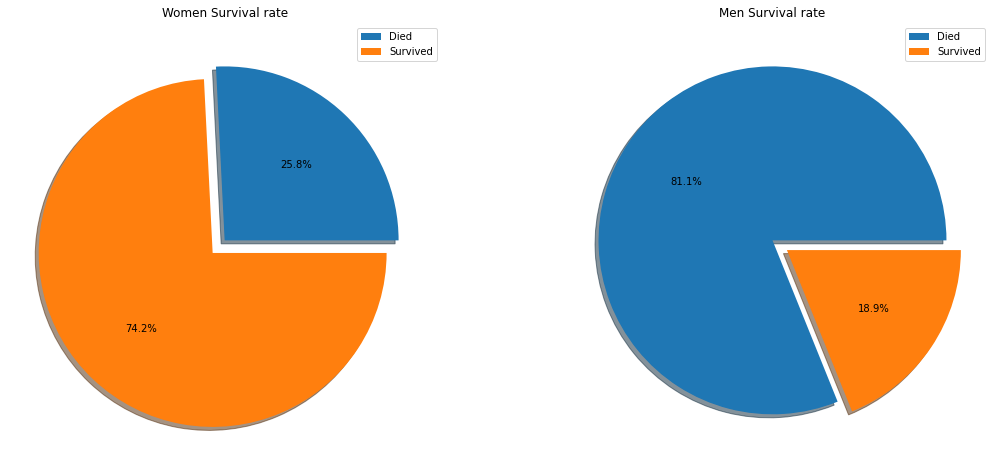

In [11]:
# Survival Plot
grp_name=['Died','Survived']
f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots

women.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=None,ax=ax[0],shadow=True)
ax[0].set_title('Women Survival rate') 
ax[0].set_ylabel('')
ax[0].legend(labels=grp_name,loc="best")

men.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],labels=None,shadow=True)
ax[1].set_title('Men Survival rate') 
ax[1].set_ylabel('')
ax[1].legend(labels=grp_name,loc="best")
plt.show()

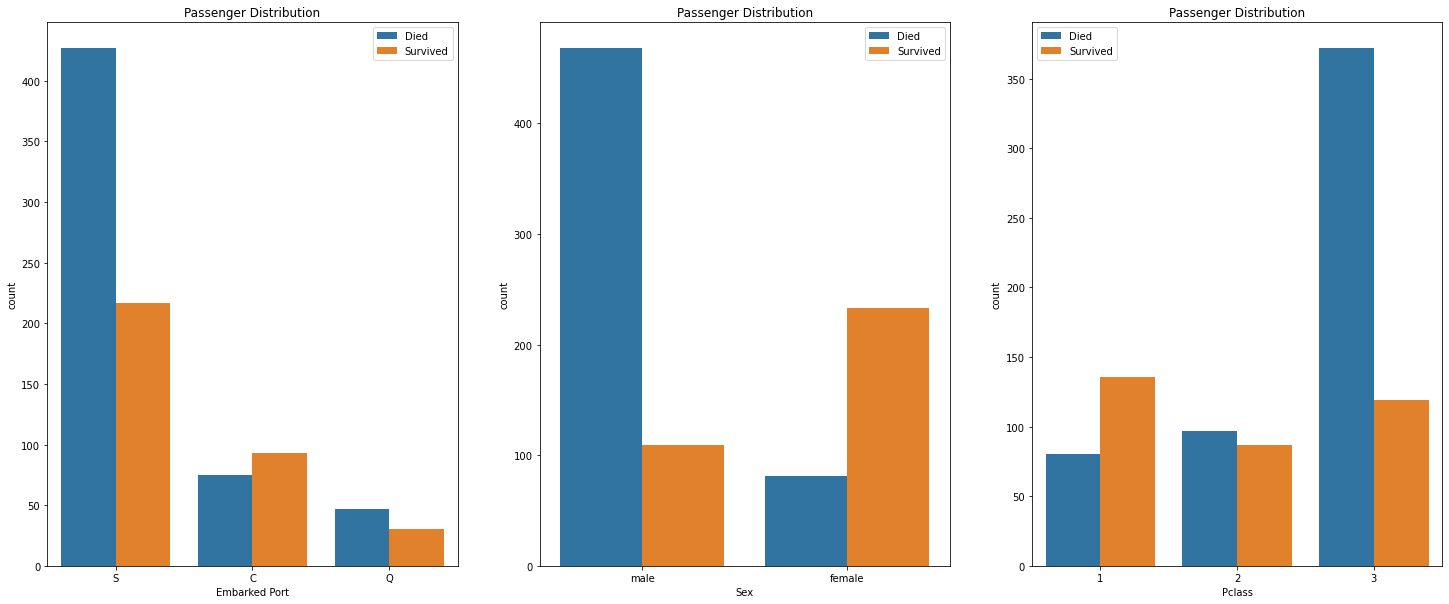

In [12]:
grp_name=['Died','Survived']

f,ax=plt.subplots(1,3,figsize=(25,10))
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[0])
ax[0].set_xlabel('Embarked Port')
ax[0].set_title('Passenger Distribution')
ax[0].legend(labels=grp_name,loc="best")

sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Passenger Distribution')
ax[1].legend(labels=grp_name,loc="best")

sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[2])
ax[2].set_title('Passenger Distribution')
ax[2].legend(labels=grp_name,loc="best")

plt.show()

# **Creating the first model**

In [13]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame(test_data)
output['Survived']= predictions

output_csv = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.head()

# Comand to submit the results
output_csv.to_csv('submission-tutorial.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


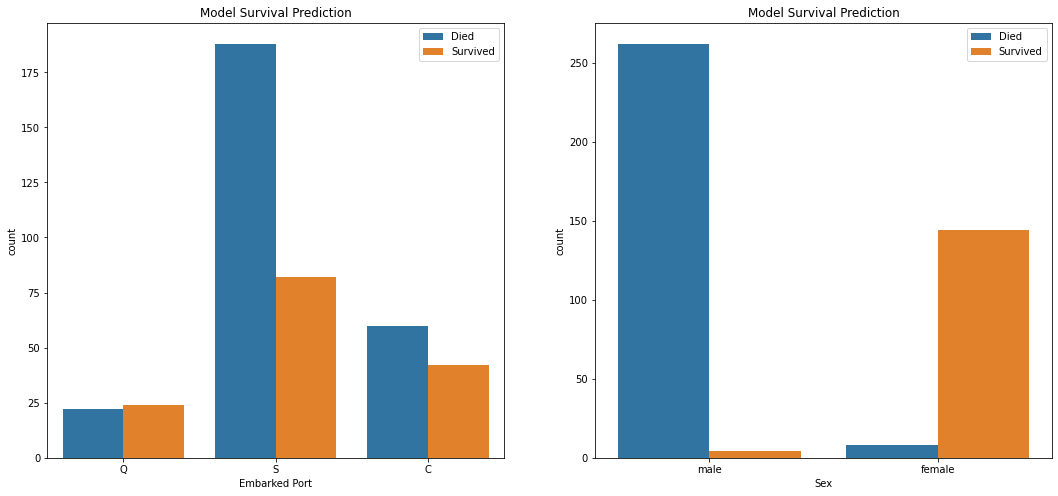

In [14]:
grp_name=['Died','Survived']
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.countplot('Embarked',hue='Survived',data=output,ax=ax[0])
ax[0].set_xlabel('Embarked Port')
ax[0].set_title('Model Survival Prediction')
ax[0].legend(labels=grp_name,loc="best")

sns.countplot('Sex',hue='Survived',data=output,ax=ax[1])
ax[1].set_title('Model Survival Prediction')
ax[1].legend(labels=grp_name,loc="best")

plt.show()

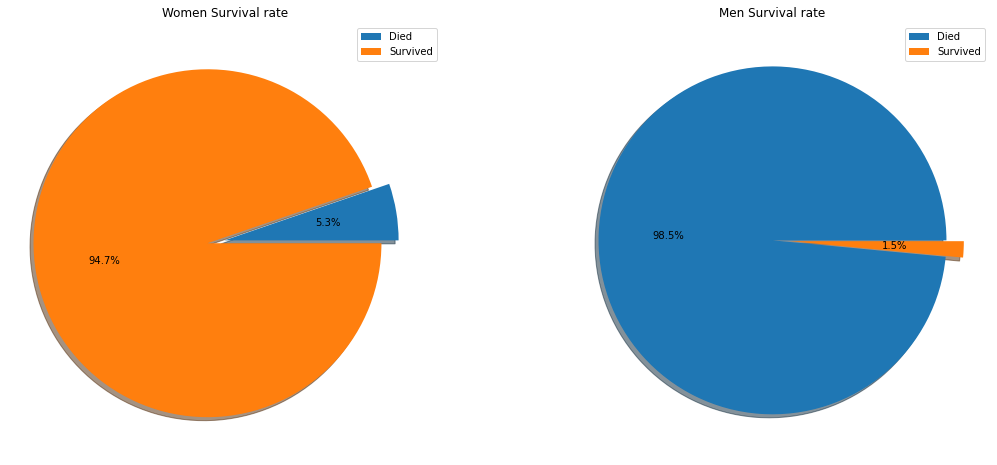

In [15]:
women = output.loc[output.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = output.loc[output.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

# Survival Plot
grp_name=['Died','Survived']
f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots

women.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=None,ax=ax[0],shadow=True)
ax[0].set_title('Women Survival rate') 
ax[0].set_ylabel('')
ax[0].legend(labels=grp_name,loc="best")

men.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],labels=None,shadow=True)
ax[1].set_title('Men Survival rate') 
ax[1].set_ylabel('')
ax[1].legend(labels=grp_name,loc="best")
plt.show()

Clearly the model is overestimating the predicitons

# **Adding Age to the model** 

To make the model more accurate age could be taken into condisderation. But age as nan values. To fill in these gaps a simple look at the mean age of the Passenger class population can be used

In [16]:
#Using the mean age of different passenger class to fill in the age gaps
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

# **Repeating the linear regression test now with age as a feature**

In [18]:
y = train_data["Survived"]

features = ["Pclass","Age","Sex","SibSp","Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame(test_data)
output['Survived']= predictions

output_csv = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.head()

# Comand to submit the results
output_csv.to_csv('submission-age.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


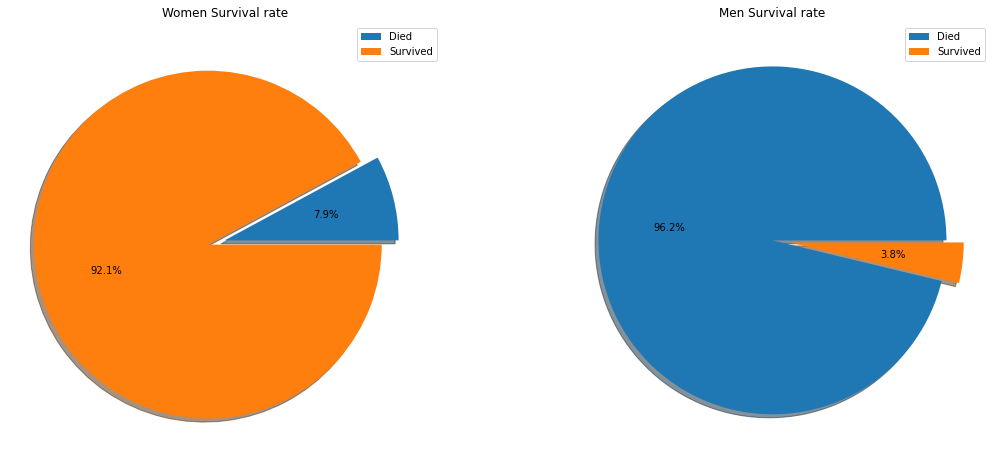

In [19]:
women = output.loc[output.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = output.loc[output.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

# Survival Plot
grp_name=['Died','Survived']
f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots

women.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=None,ax=ax[0],shadow=True)
ax[0].set_title('Women Survival rate') 
ax[0].set_ylabel('')
ax[0].legend(labels=grp_name,loc="best")

men.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],labels=None,shadow=True)
ax[1].set_title('Men Survival rate') 
ax[1].set_ylabel('')
ax[1].legend(labels=grp_name,loc="best")
plt.show()

**A bit better**

# **Lets try Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression

y = train_data["Survived"]

features = ["Pclass","Age","Sex","SibSp","Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

logmodel = LogisticRegression()
logmodel.fit(X,y)
predictions = logmodel.predict(X_test)
output = pd.DataFrame(test_data)
output['Survived']= predictions

output_csv = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.head()

# Comand to submit the results
output_csv.to_csv('submission-LogR.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


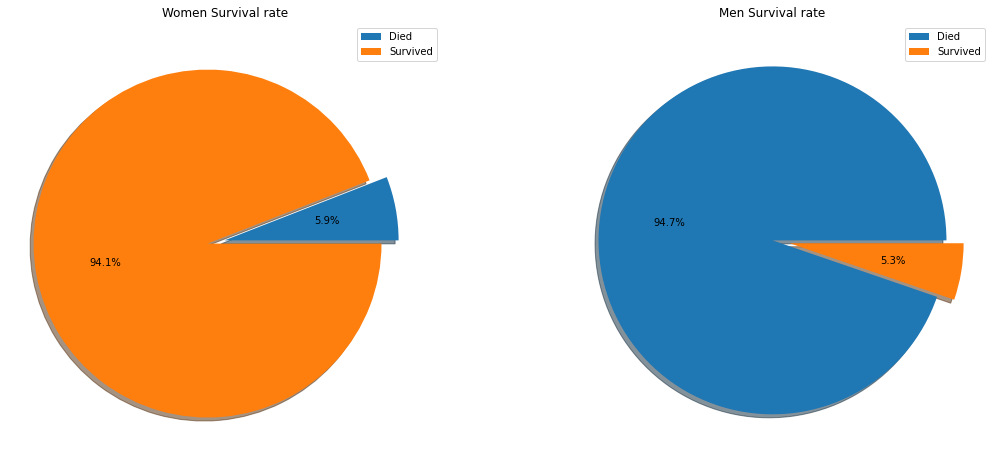

In [21]:
women = output.loc[output.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = output.loc[output.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

# Survival Plot
grp_name=['Died','Survived']
f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots

women.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=None,ax=ax[0],shadow=True)
ax[0].set_title('Women Survival rate') 
ax[0].set_ylabel('')
ax[0].legend(labels=grp_name,loc="best")

men.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],labels=None,shadow=True)
ax[1].set_title('Men Survival rate') 
ax[1].set_ylabel('')
ax[1].legend(labels=grp_name,loc="best")
plt.show()

## **Converting Categorical Features**

In [22]:
# Changing for the train data
train_1=train_data.drop(['Cabin'],axis=1)
train_1.dropna(inplace=True)
features=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Survived']
sex = pd.get_dummies(train_1['Sex'],drop_first=True)
embark = pd.get_dummies(train_1['Embarked'].dropna(),drop_first=True)
train = pd.concat([train_1[features],sex,embark],axis=1)
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,1


In [23]:
# Changing for the test data
test_1=test_data.drop(['Cabin'],axis=1)
test_1.dropna(inplace=True)
features=['PassengerId','Pclass','Age','SibSp','Parch','Fare']
sex = pd.get_dummies(test_1['Sex'],drop_first=True)
embark = pd.get_dummies(test_1['Embarked'].dropna(),drop_first=True)
test = pd.concat([test_1[features],sex,embark],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


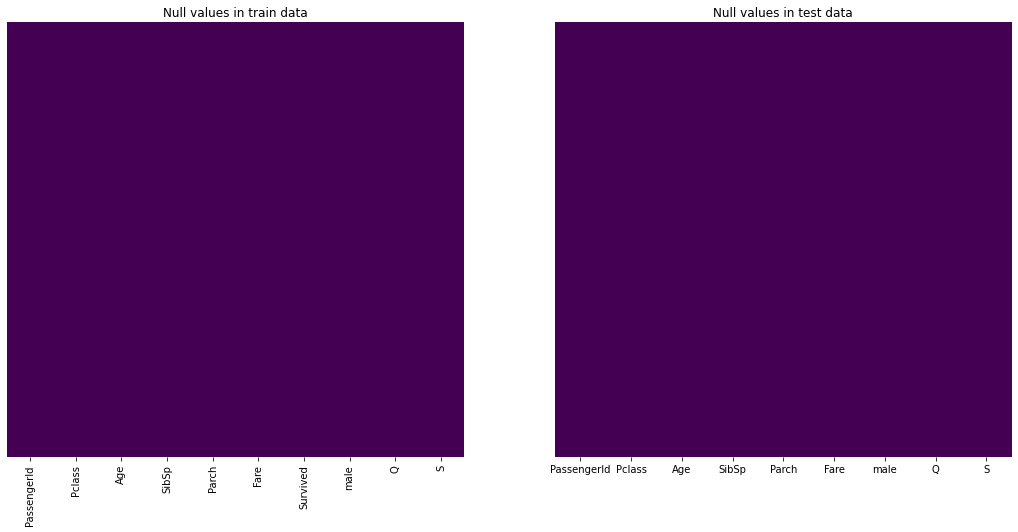

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
ax[0].set_title('Null values in train data') 

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])
ax[1].set_title('Null values in test data')

plt.show()

In [25]:
features=['Pclass','Age','SibSp','Parch','Fare','male','Q','S']
y = train['Survived']
X = train[features]

X_test = test[features]

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X,y)
predictions = logmodel.predict(X_test)
output = pd.DataFrame(test)
output['Survived']= predictions

output_csv = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})

# Comand to submit the results
output_csv.to_csv('submission-LogR2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


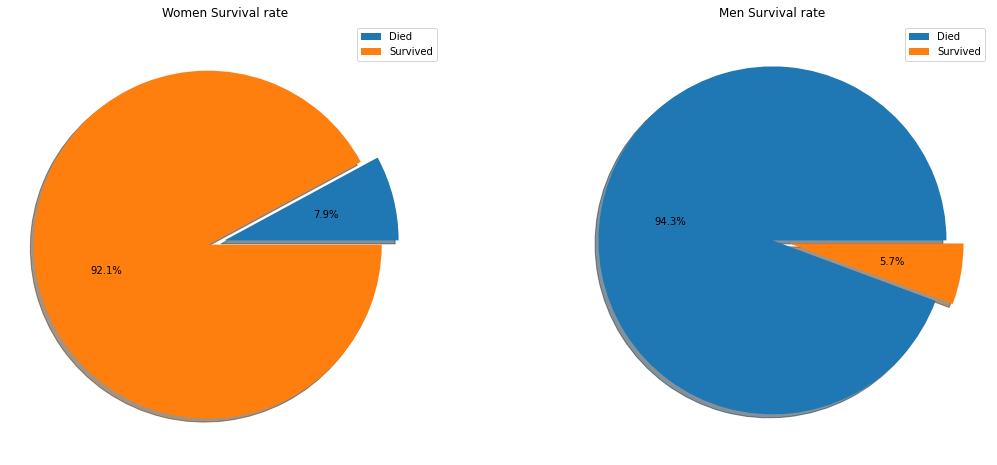

In [26]:
#output.head()

women = output.loc[output.male == 0]["Survived"]
rate_women = sum(women)/len(women)

men = output.loc[output.male == 1]["Survived"]
rate_men = sum(men)/len(men)

# Survival Plot
grp_name=['Died','Survived']
f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots

women.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=None,ax=ax[0],shadow=True)
ax[0].set_title('Women Survival rate') 
ax[0].set_ylabel('')
ax[0].legend(labels=grp_name,loc="best")

men.value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],labels=None,shadow=True)
ax[1].set_title('Men Survival rate') 
ax[1].set_ylabel('')
ax[1].legend(labels=grp_name,loc="best")
plt.show()